# Plotting

We will plot with 3 datasets this week. Let's load them. 

In [1]:
import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as pdr  # IF NECESSARY, from terminal: pip install pandas_datareader
import seaborn as sns
from numpy.random import default_rng

# these three are used to open the CCM dataset:
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen

pd.set_option("display.max_rows", 10)  # display option for pandas
# more here: https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html

## Load macro_data

In [2]:
# LOAD DATA AND CONVERT TO ANNUAL

start = 1990 # pandas datareader can infer these are years
end = 2018
macro_data = pdr.data.DataReader(['CAUR','MIUR','PAUR', # unemployment 
                                  'LXXRSA','DEXRSA','WDXRSA', # case shiller index in LA, Detroit, DC (no PA  available!)
                                  'MEHOINUSCAA672N','MEHOINUSMIA672N','MEHOINUSPAA672N'], #  
                                 'fred', start, end)
macro_data = macro_data.resample('Y').first() # get's the first observation for each variable in a given year

# CLEAN UP THE FORMATING SOMEWHAT

macro_data.index = macro_data.index.year
macro_data.columns=pd.MultiIndex.from_tuples([
    ('Unemployment','CA'),('Unemployment','MI'),('Unemployment','PA'),
    ('HouseIdx','CA'),('HouseIdx','MI'),('HouseIdx','PA'),
    ('MedIncome','CA'),('MedIncome','MI'),('MedIncome','PA')
    ])



In [3]:
year_state_tall = macro_data.stack().reset_index().rename(columns={'level_1':'state'}).sort_values(['state','DATE'])    

year_state_wide = macro_data

# one level names
year_state_wide.columns=[
    'Unemployment_CA','Unemployment_MI','Unemployment_PA',
    'HouseIdx_CA','HouseIdx_MI','HouseIdx_PA',
    'MedIncome_CA','MedIncome_MI','MedIncome_PA'
    ]

## And load CCM data

First, load the data

In [4]:
url = 'https://github.com/LeDataSciFi/ledatascifi-2023/blob/main/data/CCM_cleaned_for_class.zip?raw=true'

#firms = pd.read_stata(url)   
# <-- that code would work, but GH said it was too big and
# forced me to zip it, so here is the work around to download it:

with urlopen(url) as request:
    data = BytesIO(request.read())

with ZipFile(data) as archive:
    with archive.open(archive.namelist()[0]) as stata:
        ccm = pd.read_stata(stata)

## Sidebar: Here's a fun EDA hack:

https://ydata-profiling.ydata.ai/docs/master/index.html

Notes
- Slow with huge datasets (see webpage 
- Doesn't work with multiindex column names (must be "one level")

In [5]:
# install new package (run this one time only)
# !pip install -U ydata-profiling

# i got an error towards the end but it still installed...

In [6]:
# this package used to be called pandas-profiling
# new name, better performance (speed and features)
# from ydata_profiling import ProfileReport

# create the report:
# profile = ProfileReport(macro_data, title="Pandas Profiling Report")
# profile.to_file("macro_data_report.html")



In [7]:
year_state_wide

,Unemployment_CA,Unemployment_MI,Unemployment_PA,HouseIdx_CA,HouseIdx_MI,HouseIdx_PA,MedIncome_CA,MedIncome_MI,MedIncome_PA
DATE,,,,,,,,,
1990,5.2,7.7,5.2,100.471193,NaN,93.362855,67118.0,60358.0,58479.0
1991,7.1,8.8,6.5,95.569015,58.420806,89.706871,65490.0,62480.0,59076.0
1992,8.6,9.5,7.4,92.786926,59.748947,88.573807,66253.0,61249.0,56722.0
1993,9.8,7.6,7.2,85.246295,61.564205,89.065118,63086.0,60474.0,57387.0
1994,9.3,7.2,6.7,77.395052,64.526663,88.988467,64078.0,63992.0,58156.0
...,...,...,...,...,...,...,...,...,...
2014,8.2,8.1,6.5,216.555387,95.260332,206.958953,69292.0,59575.0,63204.0
2015,6.8,6.0,5.5,228.245834,98.235583,208.698728,72774.0,61986.0,69061.0
2016,5.7,4.9,5.3,243.470477,104.897797,212.097753,75235.0,64458.0,68847.0


In [8]:
year_state_tall

,DATE,state,HouseIdx,MedIncome,Unemployment
0,1990,CA,100.471193,67118.0,5.2
3,1991,CA,95.569015,65490.0,7.1
6,1992,CA,92.786926,66253.0,8.6
9,1993,CA,85.246295,63086.0,9.8
12,1994,CA,77.395052,64078.0,9.3
...,...,...,...,...,...
74,2014,PA,206.958953,63204.0,6.5
77,2015,PA,208.698728,69061.0,5.5
80,2016,PA,212.097753,68847.0,5.3
83,2017,PA,218.231083,67736.0,5.2


From the `year_state` data (wide or tall):

_("unemployment changes": Focus on the change in the _level_ (raw difference, not percent change) of unemployment from one year compared the prior year.)_

- Q0. How has median income has evolved over time for PA?
    - Demos...
- Q1. How has *unemployment changes* evolved over time for PA?   
- Q2. What is the distribution of unemployment changes for all states (view as one var)?   
- Q3. What is the distribution of unemployment changes for all states (separately)?
- Q4. How does unemployment changes vary with median income growth?

From the `ccm` data:

- Q5. Plot the distribution of R&D (`xrd_a`). Bonuses:
    - deal with outliers
    - add a title
    - change the x and y axis titles
- Q6: Compare R&D and CAPX. Bonuses:
    - don't plot outliers
    - avoid oversaturated plot

<AxesSubplot: xlabel='DATE'>

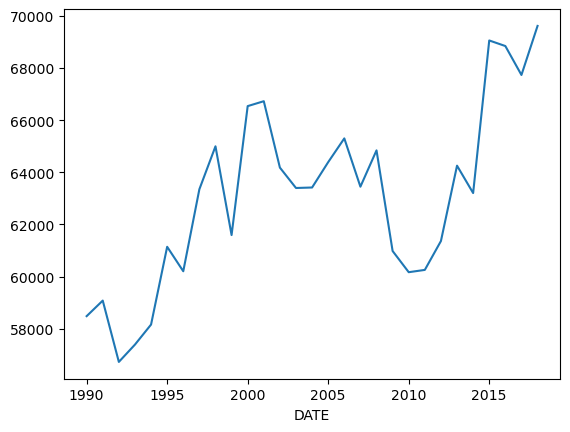

In [9]:
year_state_wide['MedIncome_PA'].plot(kind='line') # pandas .plot()

<AxesSubplot: xlabel='DATE', ylabel='MedIncome_PA'>

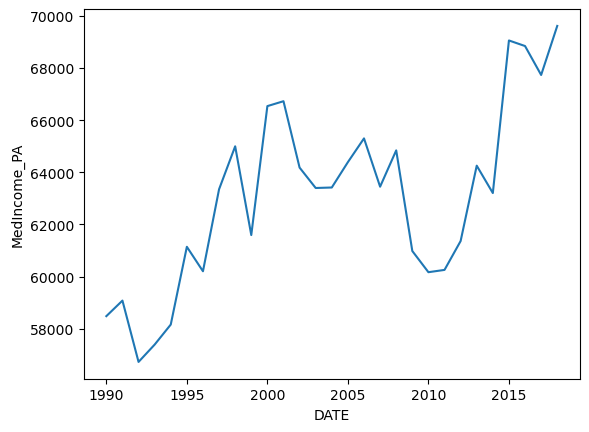

In [10]:
sns.lineplot(data=year_state_wide['MedIncome_PA']) # sns from the wide

<AxesSubplot: xlabel='DATE', ylabel='MedIncome'>

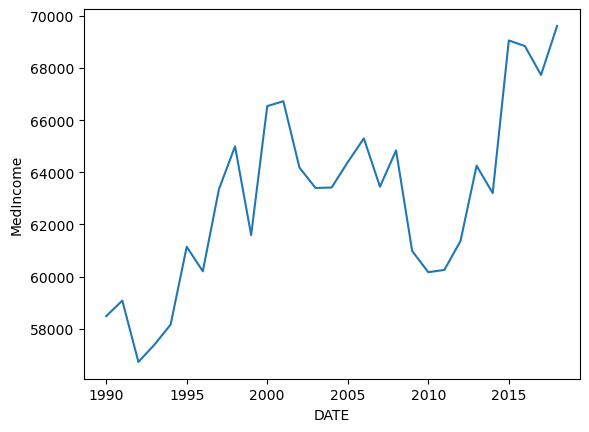

In [11]:
# sns from the tall version

sns.lineplot(data=year_state_tall.query('state == "PA" '),
             x='DATE',
             y='MedIncome',
            )

<AxesSubplot: xlabel='DATE', ylabel='MedIncome'>

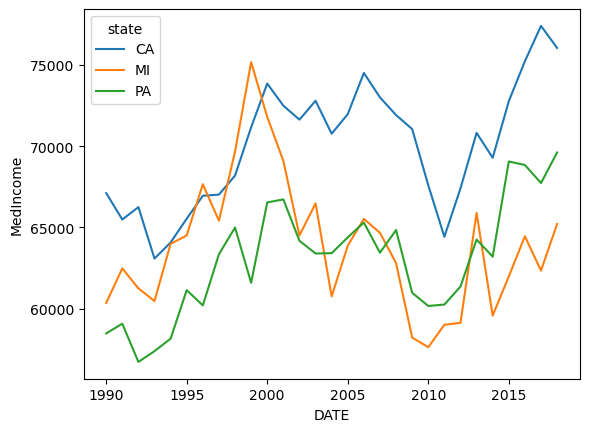

In [12]:
# try this with and without the "hue" option...
sns.lineplot(data=year_state_tall, 
             x='DATE',
             y='MedIncome',
             hue='state')  # hue >> PLOT BY SUBGROUPS, avail in many sns commands

In [13]:
# q1
# lineplot, but need CHANGE in une

<AxesSubplot: xlabel='DATE'>

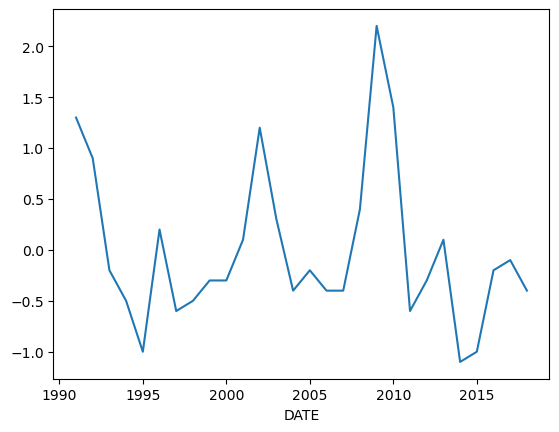

In [15]:
year_state_wide['Unemployment_PA'].diff().plot()

<AxesSubplot: xlabel='DATE'>

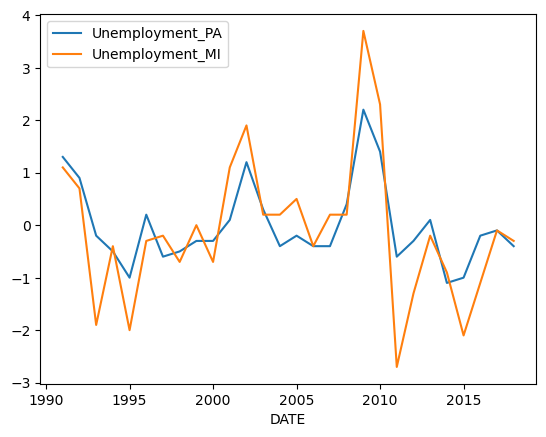

In [16]:
year_state_wide[['Unemployment_PA','Unemployment_MI']].diff().plot()

## Creating variables in TALL datasets: BE CAREFUL!!!!

Creating variables in tall datasets is much easier than in wide datasets, BUT...

Whenever the new variable relies on other rows... ensure that the definition you give it can ONLY USE THE SAME "UNIT" / group!

So if you are using
- .diff()
- .pct_change()
- .rolling() or .expanding() 
- .shift() 
- or anything else that creates a variable by using other rows!

Then: **USE GROUPBY**

In the next cell, if you delete `.groupby('state')`, then Michigan's 1990 value for the change in unemployment is 3.3... 7.7 for Michigan in 1990 minus 4.4 for CA in 2018!


In [17]:
year_state_tall['une_diff'] = year_state_tall.groupby('state')['Unemployment'].diff()
year_state_tall[27:35]

,DATE,state,HouseIdx,MedIncome,Unemployment,une_diff
81,2017,CA,256.208562,77410.0,5.2,-0.5
84,2018,CA,275.119156,76055.0,4.4,-0.8
1,1990,MI,NaN,60358.0,7.7,NaN
4,1991,MI,58.420806,62480.0,8.8,1.1
7,1992,MI,59.748947,61249.0,9.5,0.7
10,1993,MI,61.564205,60474.0,7.6,-1.9
13,1994,MI,64.526663,63992.0,7.2,-0.4
16,1995,MI,68.973289,64509.0,5.2,-2.0


<AxesSubplot: xlabel='DATE', ylabel='une_diff'>

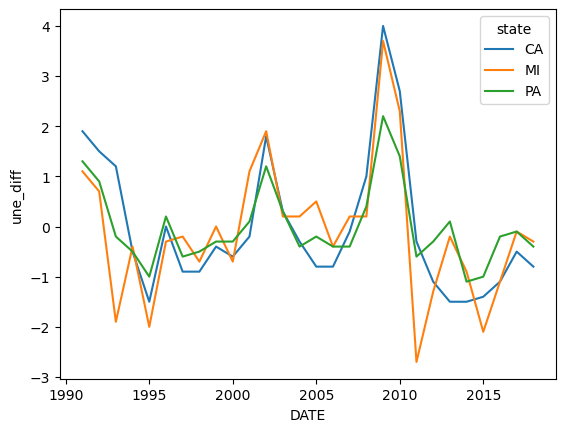

In [18]:
sns.lineplot(data=year_state_tall,
             x='DATE',
             y='une_diff',
            hue='state')

- Q2. What is the distribution of unemployment changes for all states (view as one var)?  

- Use the tall data (1 column is the 1 variable)
- Plot types include: boxplot, kde, hist, violin

<AxesSubplot: ylabel='Frequency'>

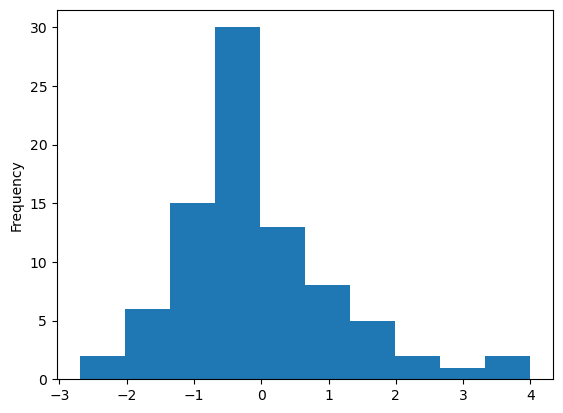

In [19]:
year_state_tall['une_diff'].plot(bins=10, kind='hist')

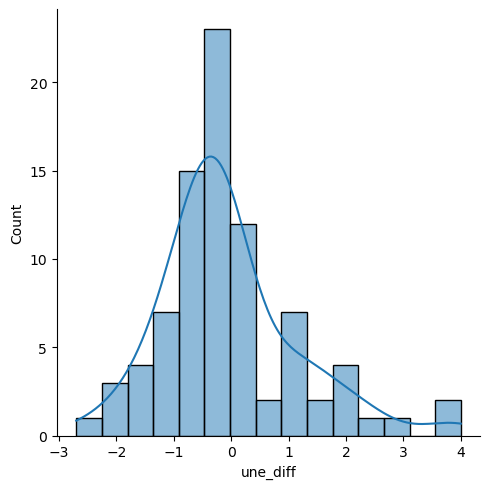

In [20]:
# displot does hist kde
# hist by default
# can layer on kde with kde=True
sns.displot(data=year_state_tall, x='une_diff',kde=True)

<AxesSubplot: xlabel='une_diff'>

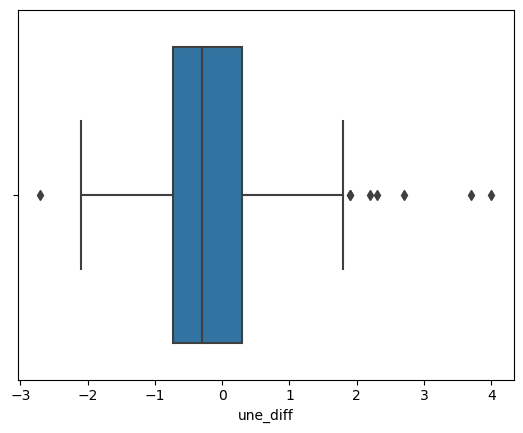

In [21]:
sns.boxplot(data=year_state_tall, 
             x = 'une_diff',
             )   

- Q3. What is the distribution of unemployment changes for all states (separately)?

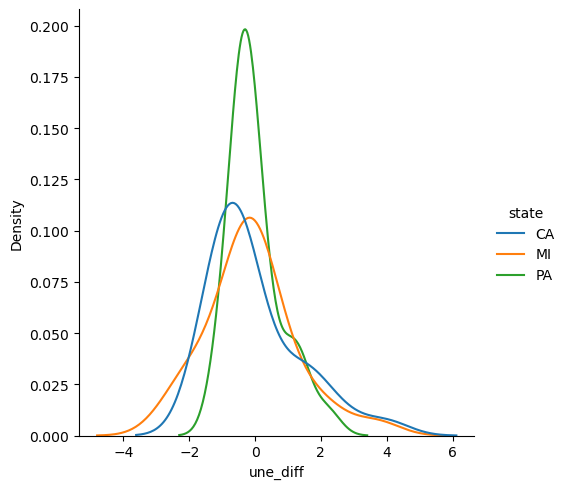

In [22]:
# distribution plot with multiple groups: kde + hue 
# kind='hist' + hue --> unusably confusing
sns.displot(data=year_state_tall, 
             kind='kde',
             x = 'une_diff',
             hue='state'
             )   

<AxesSubplot: xlabel='une_diff', ylabel='state'>

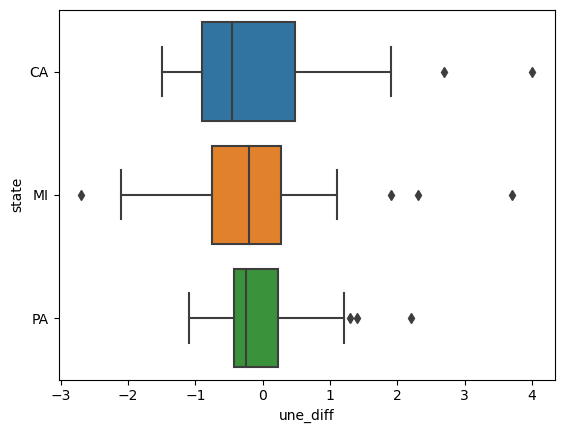

In [23]:
sns.boxplot(data=year_state_tall, 
            x='une_diff',
            y='state') # if x or y in boxplot is categorical, boxplot will repeat it!

Q4. How does unemployment changes vary with median income growth?

- Draw it!
- Look for a version of it online: seaborn gallery --> lmplot
- Look at the page for that function to see examples, how function arguments work

In [24]:
# dont forget that groupby!
year_state_tall['MedIncome_growth'] = year_state_tall.groupby('state')['MedIncome'].pct_change()

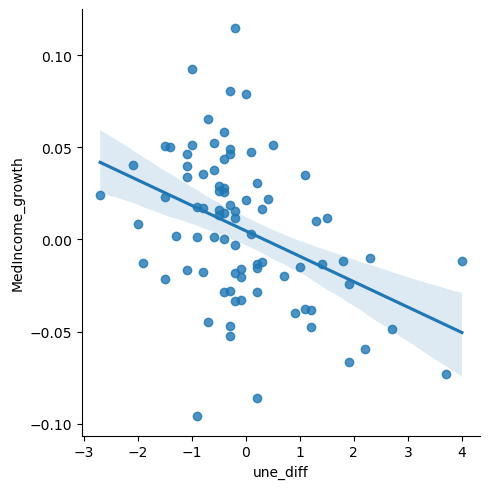

In [25]:
sns.lmplot(data=year_state_tall,
           x='une_diff',
           y='MedIncome_growth')

From the `ccm` data:

- Q5. Plot the distribution of R&D (`xrd_a`). Bonuses:
    - deal with outliers
    - add a title
    - change the x and y axis titles

In [26]:
# CCM - crsp compustat merged
# crsp - stock prices etc 
# compustat - acct variables

ccm['xrd_a'].describe()

count    223001.000000
mean          0.041004
std           0.162900
min          -0.382466
25%           0.000000
50%           0.000000
75%           0.026298
max          18.368715
Name: xrd_a, dtype: float64

Text(-3.9305555555555554, 0.5, 'COUNTOUNTOUNTONUTONT')

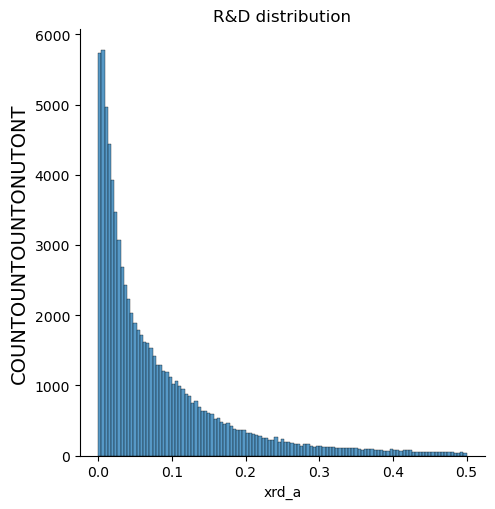

In [27]:
# outliers can hide what you're looking for ---> trick: df.query()

sns.displot(data=ccm.query('xrd_a < .5 & xrd_a > 0') ,
            x='xrd_a',
            ).set(title='R&D distribution')

# after your graph is made, you can modify it via plt
# see 3.3.5.3 in the textbook for customization tricks and pointers

plt.ylabel('COUNTOUNTOUNTONUTONT',fontsize=14)

- Q6: Compare R&D and CAPX. Bonuses:
    - don't plot outliers
    - avoid oversaturated plot

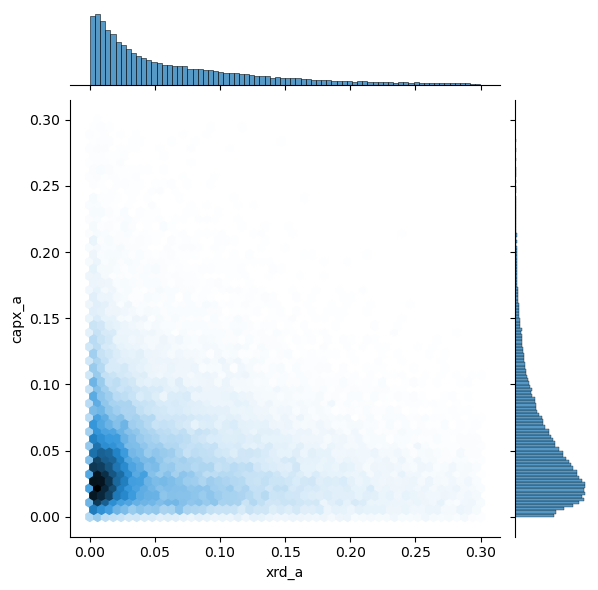

In [28]:
######################################################################
# tip: outliers - query
# tip oversaturation in graphs with scatterplots
    # use the alpha option
    # plot a part of the dataset --> data=ccm.sample(500)
    # hex plot <-- nice, but not avail in scatter (jointplot has it)
    # kind = kde is slow but does 2d topography maps
    # pairgrid_hex_reg <<< community code 
    # regplot with x_bins
######################################################################

sns.jointplot(data=ccm.query('xrd_a > 0 & xrd_a < .3 & capx_a >= 0 & capx_a < .3'),
              x='xrd_a', y ='capx_a',
             kind = 'hex')

<AxesSubplot: xlabel='xrd_a', ylabel='capx_a'>

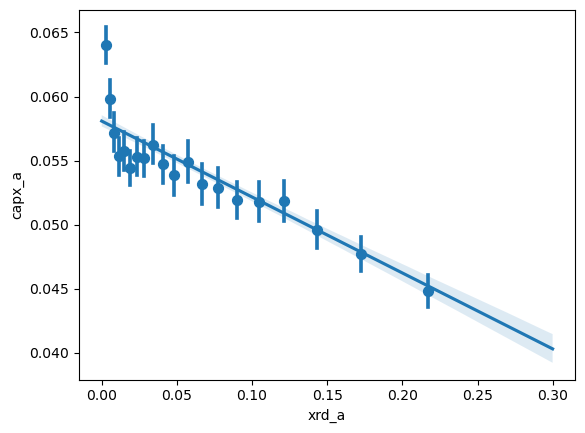

In [29]:
sns.regplot(data=ccm.query('xrd_a > 0 & xrd_a < .3 & capx_a >= 0 & capx_a < .3'),
                x='xrd_a',
                y='capx_a',
                x_bins=20
               )